About the Dataset:

* id: unique id for a news article
* title: the title of a news article
* author: author of the news article
* text: the text of the article; could be incomplete
* label: a label that marks whether the news article is real or fake:
    1: Fake news
    0: real News





# Fake News Detection

Importing Libraries

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report ,confusion_matrix



In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
# printing the stopwords in english
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Data Preprocessing

In [5]:
df = pd.read_csv('train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
df.shape

(20800, 5)

In [7]:
df.isna().sum()

,0
id,0
title,558
author,1957
text,39
label,0


* Filling Null Values with empty string

In [8]:
df = df.fillna('')

* Merging Title and author and building content column

In [9]:
df['content'] = df['author'] + " " +df['title']
df.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...


## Performing Stemming

In [10]:
port_stem = PorterStemmer()

In [11]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [12]:
df['content'] = df['content'].apply(stemming)

In [13]:
print(df['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [14]:
x = df['content'].values
y = df['label'].values

In [15]:
x

array(['darrel lucu hous dem aid even see comey letter jason chaffetz tweet',
       'daniel j flynn flynn hillari clinton big woman campu breitbart',
       'consortiumnew com truth might get fire', ...,
       'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time',
       'alex ansari nato russia hold parallel exercis balkan',
       'david swanson keep f aliv'], dtype=object)

In [16]:
y

array([1, 0, 1, ..., 0, 1, 1])

In [18]:
#  performing vectorizer , countz the frequency of words and gives significance value for all the words
#  basically converts the textual dta to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(x)

x = vectorizer.transform(x)


In [19]:
x

<20800x17128 sparse matrix of type '<class 'numpy.float64'>'
	with 210687 stored elements in Compressed Sparse Row format>

## Model Training

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


In [21]:
x_train.shape

(16640, 17128)

In [22]:
y_train.shape

(16640,)

* Logistic regression model

In [23]:
lr = LogisticRegression()

lr.fit(x_train,y_train)

LogisticRegression()

In [26]:
lr_train_pred = lr.predict(x_train)
training_accuracy = accuracy_score(lr_train_pred,y_train)
training_accuracy

0.9862379807692307

In [27]:
lr_test_pred = lr.predict(x_test)
testing_accuracy = accuracy_score(lr_test_pred,y_test)
testing_accuracy

0.9788461538461538

In [29]:
train_report = classification_report(lr_test_pred,y_test)
print(train_report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2073
           1       0.99      0.97      0.98      2087

    accuracy                           0.98      4160
   macro avg       0.98      0.98      0.98      4160
weighted avg       0.98      0.98      0.98      4160



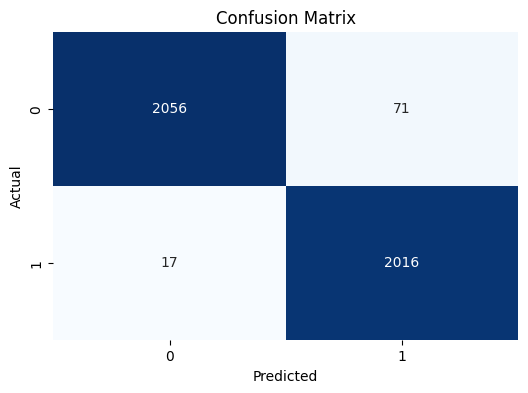

In [34]:


# Assuming y_test are the true labels and y_pred are the predicted labels
conf_matrix = confusion_matrix(y_test, lr_test_pred)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


* True Negatives (TN) = 2056: These are cases where the model correctly predicted the negative class (i.e., actual negative and predicted negative).
* False Positives (FP) = 71: These are cases where the model incorrectly predicted the positive class (i.e., actual negative but predicted positive). This is also called a "Type I error."
* False Negatives (FN) = 17: These are cases where the model incorrectly predicted the negative class (i.e., actual positive but predicted negative). This is also called a "Type II error."
* True Positives (TP) = 2016: These are cases where the model correctly predicted the positive class (i.e., actual positive and predicted positive).

In [32]:
x_new =x_test[8]

prediction = lr.predict(x_new)

if (prediction==0):
  print('Real')
else:
  print('Fake')

Fake
